In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

# Makes a request to the url
url="https://www.sec.gov/Archives/edgar/data/1541617/000154161721000009/xslForm13F_X01/altcap13f3q21infotable.xml"
#url="https://www.sec.gov/Archives/edgar/data/949012/000139834421021543/xslForm13F_X01/fp0069452_13fhr-table.xml"
request = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})

# Pass the html response into read_html
tables = pd.read_html(request.text)
df = tables[3] 
     
#df.drop(['InvoiceNo'],axis=1,inplace = True)  
#df.drop([2],inplace = True)

df.drop(df.index[[0,1,2]], inplace=True) # удаляем строки
df.drop([1,2,5,6,7,8,9,10,11],axis=1,inplace = True) # удаляем столбцы

#del df[1] столбцы можно и так удалить
#df.drop(df.columns[[0, 4, 2]], axis = 1, inplace = True) или по инлексу даже если есть лабелс
df

,0,3,4
3,ALTIMETER GROWTH CORP,102,10000
4,AMAZON COM INC,82278,25045
5,ALIBABA GROUP HLDG LTD,170554,1152000
6,BOOKING HLDGS INC,25405,10702
7,BUMBLE INC,52479,1050000
8,CCC INTELLIGENT SOLUTIONS HOLDINGS INC,3416,325000
9,CONFLUENT INC,102896,1725000
10,COUPANG INC,73604,2642857
11,CROWDSTRIKE HLDS INC,238407,970000
12,CAZOO GROUP LTD,11655,1500000


In [2]:
df[0].value_counts()

ALTIMETER GROWTH CORP                     1
MICROSOFT CORP                            1
QUALTRICS INTL INC                        1
UBER TECHNOLOGIES INC                     1
UNITY SOFTWARE INC                        1
TOAST INC                                 1
SNOWFLAKE INC                             1
SHOPIFY INC                               1
SEA LTD                                   1
ROBLOX CORP                               1
PELOTON INTERACTIVE INC                   1
PINDUODUO INC                             1
UIPATH INC                                1
OPENDOOR TECHNOLOGIES INC                 1
OKTA INC                                  1
MONDAY COM LTD                            1
AMAZON COM INC                            1
MONEYLION INC                             1
23ANDME HOLDING CO                        1
FARFETCH LTD                              1
FACEBOOK INC                              1
DUOLINGO INC                              1
CAZOO GROUP LTD                 

In [3]:
df[3] = pd.to_numeric(df[3], errors='coerce') # ВАЖНО!!! конвертируем столбец в числовое значение
df[4] = pd.to_numeric(df[4], errors='coerce')
df.groupby([0])
df.sort_values([3],ascending=False, inplace=True) # сортируем по данному столбцу в порядке убывания
df[5]=df[3]/df[4]*1000 #стоимость одной акции на дату отчета
#FamousNames = df[0].tolist()
#df = df.set_index(0)
#df

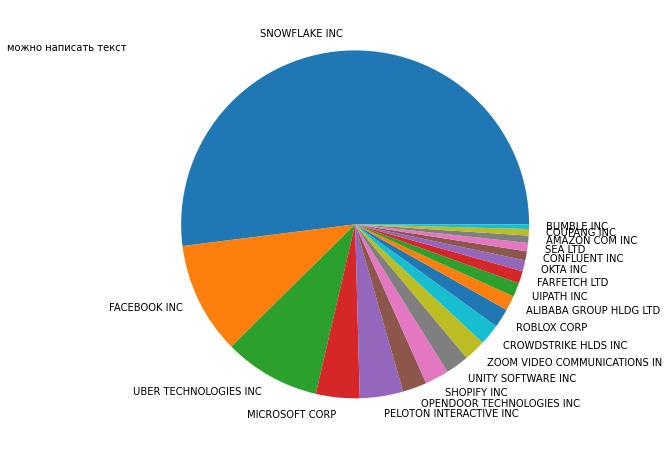

In [4]:
df = df.set_index(0)
plt.figure(figsize=(16,8))
df[3][df.index[0:20]].plot(kind='pie',fontsize=10)# выбираем колонку,строки (первые 12) и размер шрифта
#df[3][0:20].plot(kind='pie',fontsize=10,labels=df[0])
plt.ylabel('',fontsize=18) # удаляем или новое название графика справа не по названию колонки
plt.text(-2,1, "можно написать текст")#можно по указанным координатам раположить поясняющий текст
plt.show()

In [5]:
# ВОТ ЗДЕСЬ СОСТАВЛЯЮ СПИСОК ВРУЧНУЮ, А НАДО ЧТО БЫ СПИСОК COMPANIES составлялся из df[0]
# в том порядке в котором есть и подставлялся в список companies  
import pandas as pd
import requests
import json
companies=['SNOW','FB','UBER','MSFT','PTON','OPEN']
#ticker="A"
price=[]
for ticker in companies:
    response = requests.get(f"https://query2.finance.yahoo.com/v7/finance/quote?symbols={ticker}", headers={"User-Agent": "Mozilla/5.0"})
    page=response.text
    parsed_string = json.loads(page)
    price.append(parsed_string['quoteResponse']['result'][0]['regularMarketPrice'])
df1=pd.DataFrame(companies)
df1[1]=price
df1[1] = pd.to_numeric(df1[1], errors='coerce')
#df1.index = companies
df1
df1    

,0,1
0,SNOW,346.0400
1,FB,341.1800
2,UBER,42.5750
3,MSFT,337.6500
4,PTON,36.1145
5,OPEN,14.6600


In [6]:
#fullname=['SNOWFLAKE INC','FACEBOOK INC','UBER TECHNOLOGIES INC','MICROSOFT CORP','PELOTON INTERACTIVE INC','OPENDOOR TECHNOLOGIES INC']
fullname=df.index.to_list()
if len(fullname) > len(df1.index):
    del fullname[len(df1.index):] 
    #print(fullname)
#df1.index=FamousNames
df1.index=fullname
df1.drop([0],1,inplace=True)

df1

<ipython-input-6-6d83b1af26d9>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df1.drop([0],1,inplace=True)


,1
SNOWFLAKE INC,346.0400
FACEBOOK INC,341.1800
UBER TECHNOLOGIES INC,42.5750
MICROSOFT CORP,337.6500
PELOTON INTERACTIVE INC,36.1145
OPENDOOR TECHNOLOGIES INC,14.6600


In [7]:
df3=pd.concat([df,df1],axis=1)
df3[6]=(df3[1]-df3[5])/df3[5]*100
#df3
#df4=df3.rename(columns={3: 'k'}, inplace=True)
df4=df3.drop([3,4],axis=1)
df4.rename(columns={5:'AVG',1:'Price',6:'Change %'}, inplace=True)
df4


,AVG,Price,Change %
SNOWFLAKE INC,302.430018,346.0400,14.419859
FACEBOOK INC,339.389887,341.1800,0.527450
UBER TECHNOLOGIES INC,44.800000,42.5750,-4.966518
MICROSOFT CORP,281.919989,337.6500,19.768024
PELOTON INTERACTIVE INC,87.050088,36.1145,-58.512966
OPENDOOR TECHNOLOGIES INC,20.530000,14.6600,-28.592304
SHOPIFY INC,1355.780000,NaN,NaN
UNITY SOFTWARE INC,126.250194,NaN,NaN
ZOOM VIDEO COMMUNICATIONS IN,261.500000,NaN,NaN
CROWDSTRIKE HLDS INC,245.780412,NaN,NaN
